In [2]:
import numpy as np
import torch

from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm

from alogcv.diagonal import diagonal
import linops as lo

from tqdm import tqdm
# commit: 07a76f6

In [56]:
torch.manual_seed(0)
n0 = 100
p0 = 30
scale = 10
n_trials = 10

def generate_data(n, p, k_sparse=None):

    if k_sparse is None:
        k_sparse = p

    X = torch.randn(n, p) * torch.rand(n, 1) * 2

    beta = torch.zeros(p)
    beta[:k_sparse] = torch.randn(k_sparse) / np.sqrt(k_sparse)

    y = X @ beta + torch.randn(n)
    return X, y, beta

def get_ridge_H(X, lamda):
    n, p = X.shape
    H = X @ torch.linalg.solve(X.T @ X + n * lamda * torch.eye(p), X.T)
    return lo.aslinearoperator(torch.eye(n) - H)
    # return lo.aslinearoperator(H)

n = n0 * scale
p = p0 * scale
X, y, beta = generate_data(n, p)
lamda = 0.1
H = get_ridge_H(X, lamda)
y_hat = H @ y
r = y - y_hat
h = torch.diag(H @ torch.eye(n))

ms = torch.tensor([10, 20, 30, 40, 50, 60, 70, 80, 90]) * scale * 2

h_hats = torch.zeros((len(ms), n_trials, n))

for i, m in enumerate(ms):
    for t in tqdm(range(n_trials), desc=f"m={m}"):
        h_hats[i, t, :] = lo.diag.xdiag(H, m)

m=1800: 100%|██████████| 10/10 [00:01<00:00,  6.17it/s]


/var/folders/11/6tvn8zsd7ps02dw3jvvkg5840000gr/T/ipykernel_98266/431960616.py:22: RuntimeWarning: invalid value encountered in divide
  hist_mean = hist @ ymeans / hist.sum(axis=1)


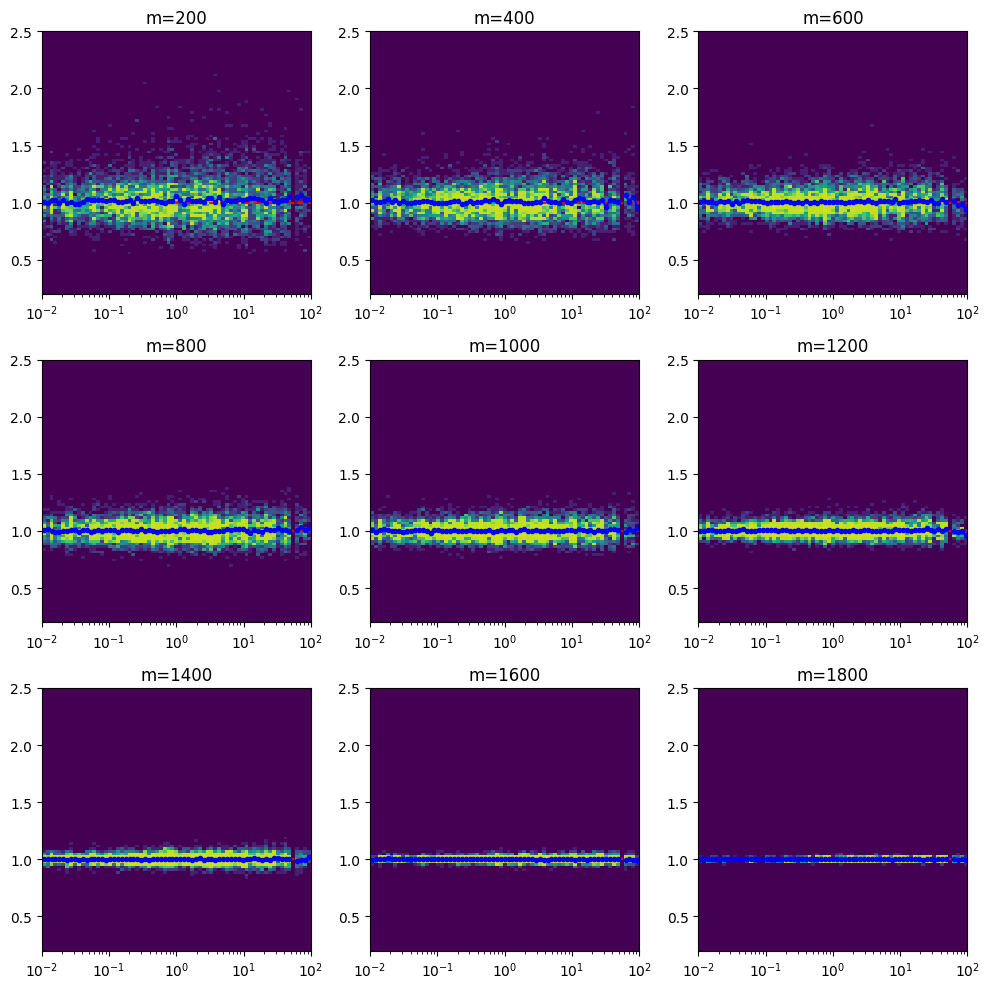

In [70]:
h_bcast = h[:, None].repeat(n_trials, 1)
r_bcast = r[:, None].repeat(n_trials, 1)
h_bcast_2 = (r_bcast / h_bcast).ravel() ** 2
# h_bcast_2 = (1 / (1 - h_bcast.ravel()))
norm = SymLogNorm(linthresh=1e1, linscale=1e1, vmin=0, vmax=200)

vmax = 100
xbins = np.logspace(-2, np.log10(vmax), 70)
xmeans = (xbins[1:] + xbins[:-1]) / 2
# ybins = np.linspace(0.9, vmax * 1.2, 100)
ybins = np.linspace(0.2, 2.5, 100)
ymeans = (ybins[1:] + ybins[:-1]) / 2

plt.figure(figsize=(10, 10))

for i, m in enumerate(ms):
    plt.subplot(3, 3, i + 1)
    h_hats_2 = (1 / h_hats[i, :, :].ravel()) ** 2
    # h_hats_2 = (1 / (1 - h_hats[i, :, :].ravel()))
    # plt.hist2d(h_bcast_2, h_hats_2 h_bcast_2, bins=[xbins, ybins], density=True, norm=norm)
    hist, _, _, _ = plt.hist2d(h_bcast_2, (h_hats_2 * h_bcast.ravel() ** 2), bins=[xbins, ybins], density=False, norm=norm)
    hist_mean = hist @ ymeans / hist.sum(axis=1)
    plt.xscale('log')
    plt.title(f"m={m}")
    # plt.plot([1, vmax], [1, vmax], 'r--')
    plt.plot([1, vmax], [1, 1], 'r--')
    plt.plot(xmeans, hist_mean, 'b.-')

plt.tight_layout()
plt.show()

/var/folders/11/6tvn8zsd7ps02dw3jvvkg5840000gr/T/ipykernel_98266/67453152.py:24: RuntimeWarning: invalid value encountered in divide
  hist_mean = hist @ ymeans / hist.sum(axis=1)


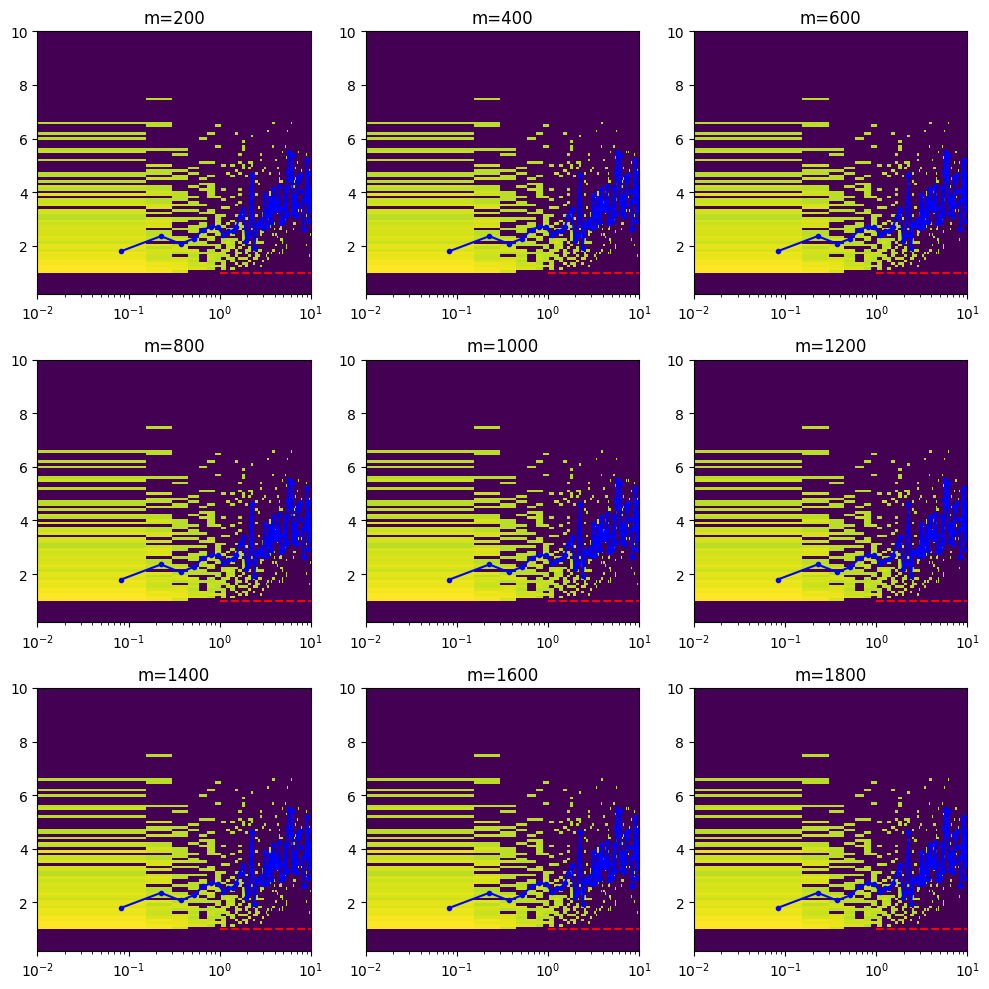

In [68]:
h_bcast = h[:, None].repeat(n_trials, 1)
r_bcast = r[:, None].repeat(n_trials, 1)
h_bcast_2 = (r_bcast / h_bcast).ravel() ** 2
# h_bcast_2 = (1 / (1 - h_bcast.ravel()))
norm = SymLogNorm(linthresh=1e1, linscale=1e1, vmin=0, vmax=200)

vmax = 10
xbins = np.linspace(1e-2, vmax, 70)
# xbins = np.logspace(-2, np.log10(vmax), 70)
xmeans = (xbins[1:] + xbins[:-1]) / 2
# ybins = np.linspace(0.9, vmax * 1.2, 100)
ybins = np.linspace(0.2, 10, 100)
ymeans = (ybins[1:] + ybins[:-1]) / 2

plt.figure(figsize=(10, 10))

for i, m in enumerate(ms):
    plt.subplot(3, 3, i + 1)
    h_hats_2 = (1 / h_hats[i, :, :].ravel()) ** 2
    # h_hats_2 = (1 / (1 - h_hats[i, :, :].ravel()))
    # plt.hist2d(h_bcast_2, h_hats_2 h_bcast_2, bins=[xbins, ybins], density=True, norm=norm)
    # hist, _, _, _ = plt.hist2d(r_bcast.ravel() ** 2, h_hats_2, bins=[xbins, ybins], density=False, norm=norm)
    hist, _, _, _ = plt.hist2d(r_bcast.ravel() ** 2, 1 / h_bcast.ravel() ** 2, bins=[xbins, ybins], density=False, norm=norm)
    hist_mean = hist @ ymeans / hist.sum(axis=1)
    plt.xscale('log')
    plt.title(f"m={m}")
    # plt.plot([1, vmax], [1, vmax], 'r--')
    plt.plot([1, vmax], [1, 1], 'r--')
    plt.plot(xmeans, hist_mean, 'b.-')

plt.tight_layout()
plt.show()

In [50]:
hist.max()

246.0